In [2]:
import os
os.chdir(r'C:\Users\luhepe\Documents\variados\_TIMESERIES\deep_learning_time_series_forecasting')

(144, 1)


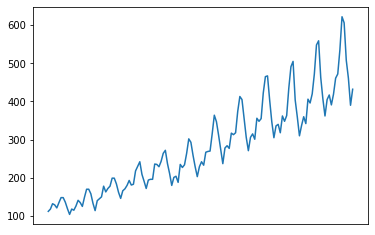

In [15]:
# load and plot monthly airline passengers dataset
from pandas import read_csv
from matplotlib import pyplot
%matplotlib inline 
# load
df = read_csv('monthly-airline-passengers.csv', header=0, index_col=0)
# summarize shape
print(df.shape)
# plot
pyplot.plot(df)
pyplot.xticks([])
pyplot.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [18]:
series=df['Passengers'].to_list()

In [25]:
from pydlm import dlm, trend, dynamic,seasonality
mydlm = dlm(series)
mydlm = mydlm + trend(degree=1, discount=0.98, name='a', w=10.0)
mydlm = mydlm + dynamic(features=[[v] for v in series], discount=1, name='b', w=10.0)
mydlm = mydlm + seasonality(period=12, discount=0.99, name='seasonal12', w=10)

In [26]:
mydlm.evolveMode('independent')

In [27]:
mydlm.noisePrior(2.0)

In [28]:
mydlm.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


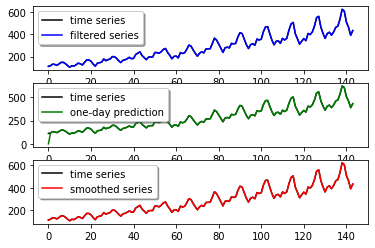

In [29]:
mydlm.plot()